# Activité: Générez des cartes de vœux avec Pandas

## Enoncé

### Scénario

Vous avez une idée de start-up ! Vous souhaitez vendre des cartes de vœux pour les anniversaires...
Ca parait simple, mais attention, il y a un twist !

Vous voulez faire un type de cartes de voeux pour le jour de la semaine de naissance du destinataire.
Vous aurez ainsi 7 types de cartes différents.

### Les données

Vous aimeriez prévoir la quantité de cartes à créer. Malheureusement, vous ne savez pas quelle quantité commander pour chaque jour.
Mais vous avez accès aux données de naissance aux États-Unis dans ce fichier (eh oui, vous partez directement à l'international !)

### Consigne

Pour mieux comprendre quelles cartes créer, vous allez donc étudier les jours de naissance des habitants des états-unis.

### Livrable

Un graphique avec trois courbes qui représentent le nombre de naissances pour chaque jour de la semaine pour les décennies 1960, 1970 et 1980.

## Exercice

Dans cette exercice nous allons procéder par étapes successives,  à savoir:

1. Chargement des données et vérification rapide
2. Nettoyage des données
3. Conditionnement des données en créant des variables intermédiaires
4. Utilisation des tables de pivot
5. Représentation des résultats

### Chargement des données et vérification rapide

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('births.csv')

df.describe(include="all")

,year,month,day,gender,births
count,15547.000000,15547.000000,15067.000000,15547,15547.000000
unique,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,F,NaN
freq,NaN,NaN,NaN,7776,NaN
mean,1979.037435,6.515919,17.769894,NaN,9762.293561
std,6.728340,3.449632,15.284034,NaN,28552.465810
min,1969.000000,1.000000,1.000000,NaN,1.000000
25%,1974.000000,4.000000,8.000000,NaN,4358.000000
50%,1979.000000,7.000000,16.000000,NaN,4814.000000
75%,1984.000000,10.000000,24.000000,NaN,5289.500000


In [2]:
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [3]:
df.tail()

,year,month,day,gender,births
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215
15546,2008,12,NaN,M,181235


On remarque:
1. la présence de données non définies (`NaN`) dans le fichier. Il faut les supprimer.
2. Certaines dates ne sont pas valides.

### Nettoyage des données

#### Elimination des valeurs `NaN`

la fonction `dropna` permet de supprimer les lignes qui contiennent des `NaN`.

In [4]:
df.dropna(inplace=True)

df.describe(include="all")

,year,month,day,gender,births
count,15067.000000,15067.000000,15067.000000,15067,15067.000000
unique,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,F,NaN
freq,NaN,NaN,NaN,7536,NaN
mean,1978.417402,6.516427,17.769894,NaN,4678.631513
std,5.762018,3.449554,15.284034,NaN,1003.104707
min,1969.000000,1.000000,1.000000,NaN,1.000000
25%,1973.000000,4.000000,8.000000,NaN,4344.000000
50%,1978.000000,7.000000,16.000000,NaN,4785.000000
75%,1983.000000,10.000000,24.000000,NaN,5247.000000


#### Elimination des dates non valides

La difficulté ici est de créer un masque permettant d'identifier toutes les lignes non valides.

In [5]:
import datetime

# fonction retournant True si la date N'est PAS valide
def is_date_not_valid(year, month, day):
    flag = False
    try:
        d = datetime.date(year, month, day)
    except ValueError:
        flag = True
    return flag

# cast `day` array en entier 
df.day = df.day.astype(np.int64)

# Cree un masque
date_not_valid = df.apply(lambda x:is_date_not_valid(x['year'], x['month'], x['day']),
                     axis=1)

df.drop(df[date_not_valid].index, inplace=True)

df.describe(include="all")

,year,month,day,gender,births
count,14610.000000,14610.000000,14610.000000,14610,14610.000000
unique,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,F,NaN
freq,NaN,NaN,NaN,7305,NaN
mean,1978.501027,6.522930,15.729637,NaN,4824.470089
std,5.766538,3.448821,8.800393,NaN,579.996983
min,1969.000000,1.000000,1.000000,NaN,3249.000000
25%,1974.000000,4.000000,8.000000,NaN,4383.000000
50%,1979.000000,7.000000,16.000000,NaN,4812.000000
75%,1984.000000,10.000000,23.000000,NaN,5259.000000


Les données sont maintenant *"nettoyées"*. 
Il reste 14610 lignes de données (au départ 15547 lignes).

### Visualisation rapide des donnees "nettoyees"

In [6]:
df.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [7]:
# Analyse des donnees
# construit une table intermediaire naissances fonction de l'annee par genre 
tmp = df.pivot_table('births', index='year',
                     columns='gender', aggfunc="sum")

tmp.head()

gender,F,M
year,,
1969,1752836,1845742
1970,1817562,1917044
1971,1736556,1826518
1972,1592159,1673704
1973,1532859,1612811


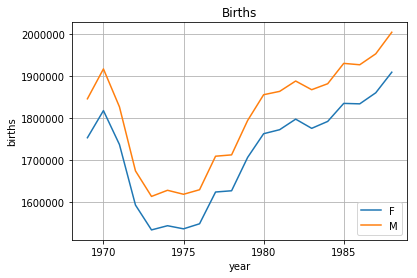

In [8]:
fig = plt.figure()
plt.grid(True)

plt.title("Births")
plt.xlabel("year")
plt.ylabel("births")

plt.xticks(np.arange(1965, 1990, 5))
plt.plot(tmp.index, tmp['F'])
plt.plot(tmp.index, tmp['M'])

plt.legend(loc='lower right');

plt.show()

###  Conditionnement des données en créant des variables intermédiaires

Nous créons trois variables intermediaires:

- decade: Décade de naissance (1960: \[1960, 1970), 1970: \[1970, 1980) et 1980: \[1980, 1990))
- date: Date de naissance
- wday: Jours de la semaine (0: lundi, 1: mardi ...)

In [9]:
# Definition de nouvelles variables
# decade: afin de classer les naissances par decade: 1960, 1970, 1980
# date: pour retrouver les jours de la semaine

df['decade'] = pd.cut(df['year'], [1960, 1970, 1980, 1990],
                      labels=['1960', '1970', '1980'], right=False)

df.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [10]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

df.head()

#births_clean.pivot_table('births', index=['year', births_clean['decade']], 
#                          columns='gender', aggfunc="sum")

#births_clean.pivot_table('births', index='decade', 
#                          columns='gender', aggfunc="sum")

,year,month,day,gender,births,decade,date
0,1969,1,1,F,4046,1960,1969-01-01
1,1969,1,1,M,4440,1960,1969-01-01
2,1969,1,2,F,4454,1960,1969-01-02
3,1969,1,2,M,4548,1960,1969-01-02
4,1969,1,3,F,4548,1960,1969-01-03


In [11]:
df['wday'] = df.apply(lambda x:x.date.weekday(),
                     axis=1)

df.head()

,year,month,day,gender,births,decade,date,wday
0,1969,1,1,F,4046,1960,1969-01-01,2
1,1969,1,1,M,4440,1960,1969-01-01,2
2,1969,1,2,F,4454,1960,1969-01-02,3
3,1969,1,2,M,4548,1960,1969-01-02,3
4,1969,1,3,F,4548,1960,1969-01-03,4


### Utilisation des tables de pivot

In [12]:
# wday: 0->Monday, 1->Tuesday, 2->Wednesday
result = df.pivot_table('births', index='wday', columns='decade', aggfunc="sum")

result.head()

decade,1960,1970,1980
wday,,,
0,526638,4895418,4949739
1,549754,5090433,5173612
2,537910,4949892,5045584
3,517742,4903588,5013476
4,531220,4992508,5069502


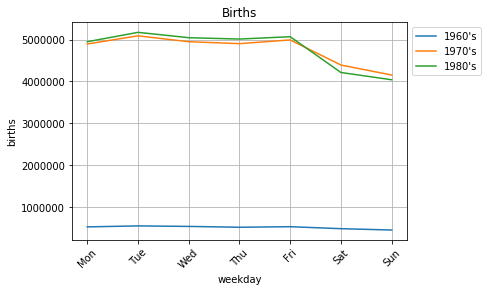

In [13]:
fig = plt.figure()
plt.grid(True)

plt.title("Births")
plt.xlabel("weekday")
plt.ylabel("births")

labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(result.index, labels, rotation=45)
         
plt.plot(result.index, result['1960'], label="1960's")
plt.plot(result.index, result['1970'], label="1970's")
plt.plot(result.index, result['1980'], label="1980's")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

### Histogramme 

Une autre facon de représenter ce résultat ...

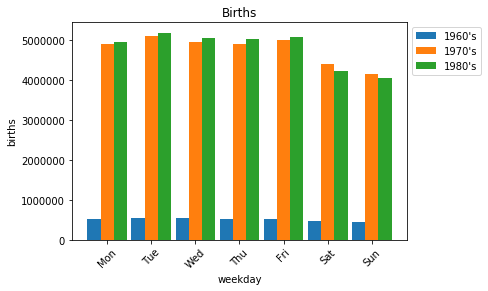

In [14]:
fig = plt.figure()
#plt.grid(True)

plt.title("Births")
plt.xlabel("weekday")
plt.ylabel("births")

labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(result.index, labels, rotation=45)
         
plt.bar(result.index - 0.3, result['1960'], width=0.3, label="1960's")
plt.bar(result.index,       result['1970'], width=0.3, label="1970's")
plt.bar(result.index + 0.3, result['1980'], width=0.3, label="1980's")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

## Conclusions

L'étude permet de prévoir la quantité de cartes à créer.

On remarque que le nombre de naissances les jours de week-end (à savoir, samedi et dimanche) est inferieur au nombre de naissances les jours de semaine (à savoir, lundi, mardi, mercredi, jeudi, vendredi).

Suite à cette étude nous pouvons faire les recommandations suivantes:

In [15]:
total_birth = np.sum(df['births'])
week = ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche']

print("Pour un lot de 1000 cartes, il faut acheter: \n")
for i in np.arange(0, 7):
    print("\t{:d} cartes pour {:s}"
          .format(int(1000 * np.sum(result.loc[i][:]) / total_birth), week[i]))

Pour un lot de 1000 cartes, il faut acheter: 

	147 cartes pour lundi
	153 cartes pour mardi
	149 cartes pour mercredi
	148 cartes pour jeudi
	150 cartes pour vendredi
	128 cartes pour samedi
	122 cartes pour dimanche
